## Mounting Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%pwd
%cd drive/My Drive
%pwd

/content/drive/My Drive


'/content/drive/My Drive'

In [0]:
%ls -ltr

total 3046
drwx------ 2 root root    4096 Nov 25 19:46 'Recipes - Annotated'/
-rw------- 1 root root    3178 Nov 26 16:46 'Scraping Recipes.py'
drwx------ 2 root root    4096 Nov 27 03:48  Auto_annotated_recipes/
drwx------ 2 root root    4096 Nov 27 03:57  annotation_code/
drwx------ 2 root root    4096 Nov 29 23:10 'Colab Notebooks'/
drwx------ 2 root root    4096 Nov 30 02:31  testrecipes/
drwx------ 2 root root    4096 Nov 30 02:39  NER_code/
drwx------ 2 root root    4096 Nov 30 05:40 'Recipes_annotated_python (1)'/
drwx------ 2 root root    4096 Nov 30 06:17  Recipes_annotated_python/
drwx------ 2 root root    4096 Nov 30 23:21 'Final Recipes corpus'/
drwx------ 2 root root    4096 Dec  2 04:38  sumeet-test/
drwx------ 2 root root    4096 Dec  6 03:01  Recipes_annotated_java_1/
drwx------ 2 root root    4096 Dec  6 06:50  Recipes_java_annotated_corenlp/
drwx------ 2 root root    4096 Dec  6 18:10 'Anyfile Notepad Files'/
drwx------ 2 root root    4096 Dec  6 19:24 'Recipes from a

## Importing Libraries

In [0]:
# Imports go here
import numpy as np
import pandas as pd
import os
import glob
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Activation, Dense, Dropout
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Using TensorFlow backend.


## File Directories

In [0]:
# Read the labeled conell files with the tag for an ingredient as B-OTH and prepare output sequence Y:
connll_directory  = '/content/drive/My Drive/ANLP-Final-Project-Submission/recipe_corpus_annotated_32/'

## Funtion to find ingredients from annotated recipe and return array of ingredients

In [0]:
def ingredient_finder(text):
  content = open(text,'r')
  tagmaps = {}
  ing=[]
  try:
    for line in content:
        words = line.strip().split(" ")
        if(words[1] == "B-OTH" and words[0] not in tagmaps.keys()):
            tagmaps[words[0]] = words[1]
            ing.append(str(words[0]))

    ingredientlables.append(tagmaps)
  except: 
    print(text)
  return ing 

## Reading all files and putting the file names in a dataframe

In [0]:
os.chdir(connll_directory )
files_labeled = [f for f in os.listdir(connll_directory)]

In [0]:
food_df=pd.DataFrame(files_labeled)
food_df.columns = ['Recipe_file']
food_df['Recipe']=food_df['Recipe_file']
food_df['Recipe']=food_df['Recipe'].str.split('.',n=1,expand=True)

food_df

,Recipe_file,Recipe
0,asparagus-pistachio-soup.txt,asparagus-pistachio-soup
1,aubergine_puree.txt,aubergine_puree
2,clam_chowder.txt,clam_chowder
3,easy_pumpkin_soup.txt,easy_pumpkin_soup
4,beans_midly_spiced_and_stir-fried.txt,beans_midly_spiced_and_stir-fried
5,dolmeh.txt,dolmeh
6,easy_microwave_tomato.txt,easy_microwave_tomato
7,easy_grilled_leeks_with_grated_cheese.txt,easy_grilled_leeks_with_grated_cheese
8,basque-style_cream_mushroom_soup_saveur.txt,basque-style_cream_mushroom_soup_saveur
9,grilled_onions.txt,grilled_onions


In [0]:
ingredient_finder('clam_chowder.txt')

clam_chowder.txt


['potatoes',
 'potato',
 'floury',
 'boiled',
 'bacon',
 'pork',
 'onion',
 'thyme',
 'peppercorns',
 'paprika',
 'butter',
 'cornmeal',
 'corn',
 'notice',
 'nicer',
 'appearance',
 'leafless',
 'shells',
 'juices',
 'oils',
 'leaflets',
 'bread',
 'salad']

## Creating new column containing ingredients array with the created function

In [0]:
food_df['Ingredients'] = food_df['Recipe_file'].apply(lambda x: ingredient_finder(x))

asparagus-pistachio-soup.txt
aubergine_puree.txt
clam_chowder.txt
easy_pumpkin_soup.txt
beans_midly_spiced_and_stir-fried.txt
dolmeh.txt
easy_microwave_tomato.txt
easy_grilled_leeks_with_grated_cheese.txt
basque-style_cream_mushroom_soup_saveur.txt
grilled_onions.txt
kimchi.txt
healthy_asian_apple_soup.txt
hot_and_sour_shrimp_soup.txt
lettuce_soup.txt
hot_and_sour_cucumbers.txt
hoomos.txt
kapustniak.txt
latkes.txt
kapustnica_sour_cabbage_soup.txt
madjara.txt
mango.txt
oyster_stew.txt
reasted_red_onion_soup.txt
mechthilds_sweet_potatoes.txt
sopa_de_carbasso_bercelonia.txt
potato-turnip_balls.txt
monastery_style_bean_soup.txt
quick_and_dirty.txt
southwestern_onion_soup.txt
stuffed_aubergines.txt
stuffed_peppers_with_egg_and_cheese.txt
sweet_red_pepper_soup.txt


In [0]:
food_df

,Recipe_file,Recipe,Ingredients
0,asparagus-pistachio-soup.txt,asparagus-pistachio-soup,"[soup, salt, salted, pistachios, butter, salty..."
1,aubergine_puree.txt,aubergine_puree,"[aubergine, aubergines, peppers, tomatoes, clo..."
2,clam_chowder.txt,clam_chowder,"[potatoes, potato, floury, boiled, bacon, pork..."
3,easy_pumpkin_soup.txt,easy_pumpkin_soup,"[pumpkin, butternut]"
4,beans_midly_spiced_and_stir-fried.txt,beans_midly_spiced_and_stir-fried,"[beans, spiced, turmeric, powder, curry, leave..."
5,dolmeh.txt,dolmeh,"[leaf, leaves, rice, peas, sugar, sabzi, herbs..."
6,easy_microwave_tomato.txt,easy_microwave_tomato,[tomato]
7,easy_grilled_leeks_with_grated_cheese.txt,easy_grilled_leeks_with_grated_cheese,"[leeks, cheese, olive, boil]"
8,basque-style_cream_mushroom_soup_saveur.txt,basque-style_cream_mushroom_soup_saveur,"[creamy, mushroom, mushrooms, portobello, porc..."
9,grilled_onions.txt,grilled_onions,[lime]


In [0]:
len(food_df)

32

## Creating train and test data

In [0]:
train_size = int(len(food_df) * .8)
train_posts = food_df['Ingredients']
train_tags = food_df['Recipe']
train_files_names = food_df['Recipe_file']
 
test_posts = food_df['Ingredients'][train_size:]
test_tags = food_df['Recipe'][train_size:]
test_files_names = food_df['Recipe_file'][train_size:]

In [0]:
len(train_tags)

32

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_posts)
 
x_train = tokenizer.texts_to_matrix(train_posts, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_posts, mode='tfidf')
 
encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

## Creating input and output shape for Neural-Network Model

In [0]:
vocab_size = x_train.shape[1]
print(vocab_size)

178


In [0]:
num_labels = y_train.shape[1]
num_labels

32

In [0]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((32, 178), (32, 32), (7, 178), (7, 32))

## Function to plot loss and accuracy

In [0]:
# Function to plot the statistics
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

## Model Architecture

In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               91648     
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)               

## Loss and optimiser for model

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Model Training

In [0]:
history = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 28 samples, validate on 4 samples
Epoch 1/30





28/28 [==============================] - 5s 172ms/step - loss: 3.5263 - acc: 0.0000e+00 - val_loss: 3.6207 - val_acc: 0.0000e+00
Epoch 2/30
28/28 [==============================] - 0s 851us/step - loss: 3.0647 - acc: 0.3929 - val_loss: 3.7340 - val_acc: 0.0000e+00
Epoch 3/30
28/28 [==============================] - 0s 827us/step - loss: 2.5327 - acc: 0.7143 - val_loss: 3.8570 - val_acc: 0.0000e+00
Epoch 4/30
28/28 [==============================] - 0s 817us/step - loss: 2.1505 - acc: 0.8571 - val_loss: 3.9831 - val_acc: 0.0000e+00
Epoch 5/30
28/28 [==============================] - 0s 859us/step - loss: 1.7936 - acc: 0.8929 - val_loss: 4.1314 - val_acc: 0.0000e+00
Epoch 6/30
28/28 [==============================] - 0s 861us/step - loss: 1.5203 - acc: 0.9286 - val_loss: 4.3034 - val_acc: 0.0000e+00
Epoch 7/30
28/28 [=================

## Loss,Accuracy plots

Training Accuracy: 0.8750
Testing Accuracy:  0.4286


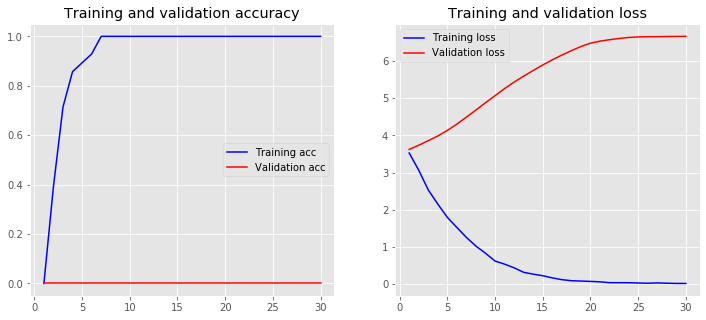

In [0]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

## Preparing data to test

In [0]:
text_labels = encoder.classes_

In [0]:
text_labels

array(['asparagus-pistachio-soup', 'aubergine_puree',
       'basque-style_cream_mushroom_soup_saveur',
       'beans_midly_spiced_and_stir-fried', 'clam_chowder', 'dolmeh',
       'easy_grilled_leeks_with_grated_cheese', 'easy_microwave_tomato',
       'easy_pumpkin_soup', 'grilled_onions', 'healthy_asian_apple_soup',
       'hoomos', 'hot_and_sour_cucumbers', 'hot_and_sour_shrimp_soup',
       'kapustniak', 'kapustnica_sour_cabbage_soup', 'kimchi', 'latkes',
       'lettuce_soup', 'madjara', 'mango', 'mechthilds_sweet_potatoes',
       'monastery_style_bean_soup', 'oyster_stew', 'potato-turnip_balls',
       'quick_and_dirty', 'reasted_red_onion_soup',
       'sopa_de_carbasso_bercelonia', 'southwestern_onion_soup',
       'stuffed_aubergines', 'stuffed_peppers_with_egg_and_cheese',
       'sweet_red_pepper_soup'], dtype='<U39')

## Dummy data arrays

In [0]:
a=['apples','bananas','eggs', 'tomato','lettuce', 'ham', 'creme', 'eggs', 'creamy', 'nicely']

In [0]:
b=['bean', 'chillies', 'choice', 'mint','tahiini', 'garbanzos', 'sesame']

## Function to predict recipe by taking ingredient as input

In [0]:
def recipe_suggestor(ingredients):
  n=len(ingredients)
  interim_results = tokenizer.texts_to_matrix(ingredients,mode='tfidf')
  prediction = model.predict(np.array(interim_results))
  pred_label=[]
  for i in range(n):
    predicted_label = text_labels[np.argmax(prediction[i])]
    pred_label.append(predicted_label)
  Result=set(pred_label)
  Result=list(Result)
  return Result  


## Results

In [0]:
recipe_suggestor(a)

['grilled_onions',
 'healthy_asian_apple_soup',
 'easy_microwave_tomato',
 'lettuce_soup',
 'quick_and_dirty']

In [0]:
recipe_suggestor(b)

['monastery_style_bean_soup', 'hoomos']